In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [96]:
# Load the dataset
df = pd.read_csv('Dataset .csv')


In [97]:
# Explore data
display(df.head())



,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [98]:
# Drop unnecessary columns and handle missing values
columns_to_drop = ['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose']
df = df.drop(columns=columns_to_drop, axis=1)
df = df.dropna()
df.head(3)


,Country Code,City,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,162,Makati City,121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,162,Makati City,121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,162,Mandaluyong City,121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [99]:
# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)
df.head(3)


,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,City_Agra,City_Ahmedabad,City_Albany,...,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_White,Rating color_Yellow,Rating text_Excellent,Rating text_Good,Rating text_Not rated,Rating text_Poor,Rating text_Very Good
0,162,121.027535,14.565443,1100,3,4.8,314,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,162,121.014101,14.553708,1200,3,4.5,591,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,162,121.056831,14.581404,4000,4,4.4,270,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [100]:
# Split the data into features (X) and target (y)
X = df.drop('Aggregate rating', axis=1)  # Features
y = df['Aggregate rating']  # Target



In [101]:
X

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Votes,City_Agra,City_Ahmedabad,City_Albany,City_Allahabad,...,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_White,Rating color_Yellow,Rating text_Excellent,Rating text_Good,Rating text_Not rated,Rating text_Poor,Rating text_Very Good
0,162,121.027535,14.565443,1100,3,314,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,162,121.014101,14.553708,1200,3,591,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,162,121.056831,14.581404,4000,4,270,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,162,121.056475,14.585318,1500,4,365,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,162,121.057508,14.584450,1500,4,229,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,208,28.977392,41.022793,80,3,788,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
9547,208,29.041297,41.009847,105,3,1034,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
9548,208,29.034640,41.055817,170,4,661,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
9549,208,29.036019,41.057979,120,4,901,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [102]:
y

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9542, dtype: float64

In [103]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [104]:
X_train

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Votes,City_Agra,City_Ahmedabad,City_Albany,City_Allahabad,...,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_White,Rating color_Yellow,Rating text_Excellent,Rating text_Good,Rating text_Not rated,Rating text_Poor,Rating text_Very Good
8177,1,77.353663,28.574219,450,1,6,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6401,1,77.134360,28.671141,700,2,112,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
81,30,-46.746958,-23.609207,120,4,11,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1332,1,77.086080,28.482318,300,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
9041,1,77.339801,28.586405,500,2,93,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5743,1,77.052860,28.664641,250,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5200,1,77.211180,28.536406,300,1,308,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5399,1,77.128051,28.478595,500,2,4,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
869,1,77.305745,28.490062,100,1,7,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [105]:
X_test

,Country Code,Longitude,Latitude,Average Cost for two,Price range,Votes,City_Agra,City_Ahmedabad,City_Albany,City_Allahabad,...,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_White,Rating color_Yellow,Rating text_Excellent,Rating text_Good,Rating text_Not rated,Rating text_Poor,Rating text_Very Good
7142,1,0.000000,0.000000,150,1,2,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1860,1,77.064227,28.467934,1500,3,105,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4425,1,77.250660,28.543755,250,1,55,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3219,1,77.230277,28.572796,1500,3,245,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
8308,1,77.331711,28.548867,200,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5612,1,77.219281,28.709557,100,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4061,1,0.000000,0.000000,500,2,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8746,1,77.385241,28.569480,400,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
7678,1,77.056812,28.622119,400,1,3,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [106]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100)
}



In [107]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'MAE': mae, 'R2': r2}
    print(f"{name} Results:\nRMSE: {rmse:.2f}, MAE: {mae:.2f}, R2: {r2:.2f}\n")



Linear Regression Results:
RMSE: 0.19, MAE: 0.14, R2: 0.98

Decision Tree Results:
RMSE: 0.24, MAE: 0.15, R2: 0.98

Random Forest Results:
RMSE: 0.17, MAE: 0.12, R2: 0.99



In [108]:
# Compare Results
results_df = pd.DataFrame(results).T
print(results_df)



                       RMSE       MAE        R2
Linear Regression  0.187409  0.138913  0.984663
Decision Tree      0.236650  0.149450  0.975545
Random Forest      0.174925  0.118113  0.986638


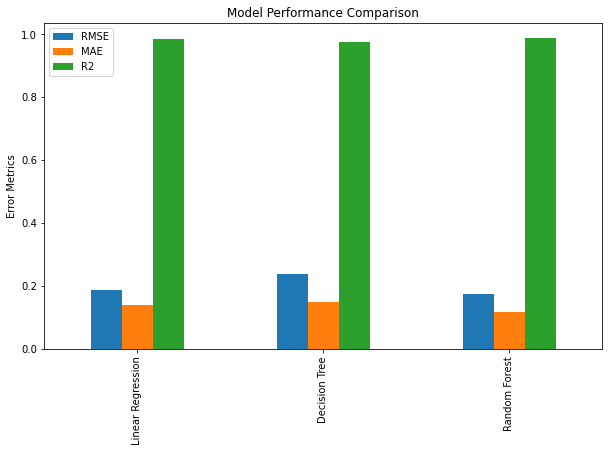

In [109]:
# Optional: Visualize results
import matplotlib.pyplot as plt
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Error Metrics')
plt.show()
